In [0]:
# if you keras is not using tensorflow as backend set "KERAS_BACKEND=tensorflow" use this command
from keras.utils import np_utils 
from keras.datasets import mnist 
import seaborn as sns
from keras.initializers import RandomNormal
from keras.layers.normalization import BatchNormalization

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [0]:
# Credits: https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py

import matplotlib.pyplot as plt
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# Assignment:

## Model-1: 3 Conv-Layers, dropout, Max-pooling with 3*3 kernel:

In [0]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(84, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.75))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 10s 171us/step - loss: 1.2433 - acc: 0.5709 - val_loss: 0.2273 - val_acc: 0.9449
Epoch 2/12
60000/60000 [==============================] - 8s 134us/step - loss: 0.5782 - acc: 0.8168 - val_loss: 0.1377 - val_acc: 0.9610
Epoch 3/12
60000/60000 [==============================] - 8s 138us/step - loss: 0.4653 - acc: 0.8577 - val_loss: 0.1160 - val_acc: 0.9675
Epoch 4/12
60000/60000 [==============================] - 8s 136us/step - loss: 0.4117 - acc: 0.8740 - val_loss: 0.1130 - val_acc: 0.9687
Epoch 5/12
60000/60000 [==============================] - 8s 136us/step - loss: 0.3725 - acc: 0.8864 - val_loss: 0.0941 - val_acc: 0.9710
Epoch 6/12
60000/60000 [==============================] - 8s 136us/step - loss: 0.3515 - acc: 0.8928 - val_loss: 0.0884 - val_acc: 0.9730
Epoch 7/12
60000/60000 [==============================] - 8s 137us/step - loss: 0.3272 - acc: 0.9011 - val_loss: 0.0860 -

Test score: 0.07088609065115452
Test accuracy: 0.9791


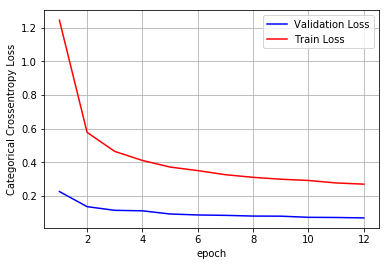

In [0]:
score = model.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,12+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

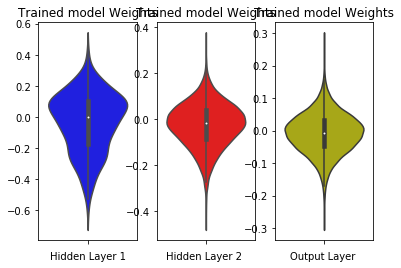

In [0]:
w_after = model.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

## Model-2: 3 Conv-Layers, dropout, Max-pooling with 5*5 kernel:

In [0]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(5, 5),activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (5, 5), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(84, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.75))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 11s 184us/step - loss: 0.5625 - acc: 0.8130 - val_loss: 0.0720 - val_acc: 0.9793
Epoch 2/12
60000/60000 [==============================] - 9s 150us/step - loss: 0.1591 - acc: 0.9540 - val_loss: 0.0454 - val_acc: 0.9859
Epoch 3/12
60000/60000 [==============================] - 9s 149us/step - loss: 0.1134 - acc: 0.9678 - val_loss: 0.0400 - val_acc: 0.9867
Epoch 4/12
60000/60000 [==============================] - 9s 149us/step - loss: 0.0926 - acc: 0.9742 - val_loss: 0.0276 - val_acc: 0.9915
Epoch 5/12
60000/60000 [==============================] - 9s 149us/step - loss: 0.0807 - acc: 0.9778 - val_loss: 0.0242 - val_acc: 0.9923
Epoch 6/12
60000/60000 [==============================] - 9s 149us/step - loss: 0.0726 - acc: 0.9806 - val_loss: 0.0265 - val_acc: 0.9919
Epoch 7/12
60000/60000 [==============================] - 9s 149us/step - loss: 0.0676 - acc: 0.9811 - val_loss: 0.0256 -

Test score: 0.018479915870346305
Test accuracy: 0.9949


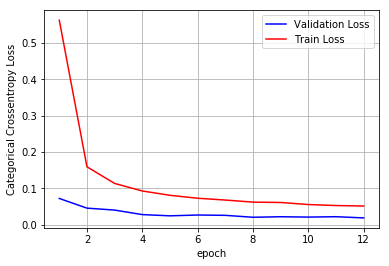

In [0]:
score = model.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,12+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

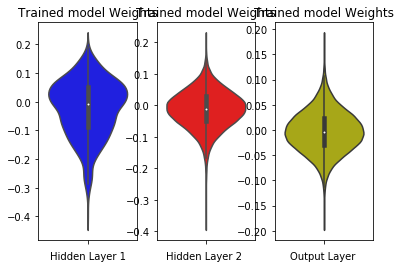

In [0]:
w_after = model.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

## Model-3: 3 Conv-Layers, dropout, Max-pooling with 7*7 kernel:

In [0]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(7, 7),activation='relu',input_shape=input_shape,padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (7, 7), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(84, (7, 7), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.75))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 17s 291us/step - loss: 0.4669 - acc: 0.8464 - val_loss: 0.0555 - val_acc: 0.9836
Epoch 2/12
60000/60000 [==============================] - 15s 254us/step - loss: 0.1194 - acc: 0.9664 - val_loss: 0.0357 - val_acc: 0.9891
Epoch 3/12
60000/60000 [==============================] - 15s 254us/step - loss: 0.0883 - acc: 0.9750 - val_loss: 0.0286 - val_acc: 0.9902
Epoch 4/12
60000/60000 [==============================] - 15s 255us/step - loss: 0.0727 - acc: 0.9805 - val_loss: 0.0257 - val_acc: 0.9923
Epoch 5/12
60000/60000 [==============================] - 15s 257us/step - loss: 0.0628 - acc: 0.9830 - val_loss: 0.0219 - val_acc: 0.9931
Epoch 6/12
60000/60000 [==============================] - 15s 258us/step - loss: 0.0550 - acc: 0.9848 - val_loss: 0.0227 - val_acc: 0.9934
Epoch 7/12
60000/60000 [==============================] - 16s 259us/step - loss: 0.0494 - acc: 0.9859 - val_loss: 0.

Test score: 0.020393834800141484
Test accuracy: 0.9939


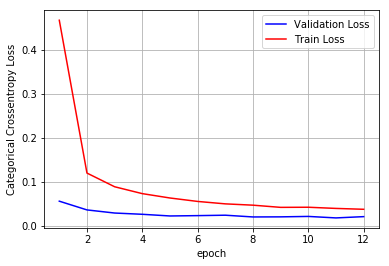

In [0]:
score = model.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,12+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

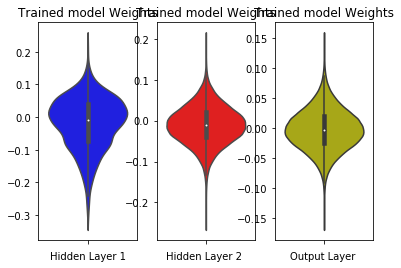

In [0]:
w_after = model.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

## Model-4: 5 Conv-Layers, dropout, Max-pooling with 3*3 kernel:

In [0]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(42, (3, 3), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(52, (3, 3), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.75))

model.add(Conv2D(62, (3, 3), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.75))

model.add(Conv2D(72, (3, 3), activation='relu',padding='same'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.75))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 12s 196us/step - loss: 1.1704 - acc: 0.5828 - val_loss: 0.1327 - val_acc: 0.9648
Epoch 2/12
60000/60000 [==============================] - 9s 156us/step - loss: 0.3683 - acc: 0.8836 - val_loss: 0.0750 - val_acc: 0.9797
Epoch 3/12
60000/60000 [==============================] - 9s 155us/step - loss: 0.2697 - acc: 0.9171 - val_loss: 0.0602 - val_acc: 0.9845
Epoch 4/12
60000/60000 [==============================] - 9s 156us/step - loss: 0.2265 - acc: 0.9308 - val_loss: 0.0560 - val_acc: 0.9861
Epoch 5/12
60000/60000 [==============================] - 9s 156us/step - loss: 0.2043 - acc: 0.9394 - val_loss: 0.0446 - val_acc: 0.9886
Epoch 6/12
60000/60000 [==============================] - 9s 156us/step - loss: 0.1761 - acc: 0.9479 - val_loss: 0.0474 - val_acc: 0.9900
Epoch 7/12
60000/60000 [==============================] - 9s 156us/step - loss: 0.1648 - acc: 0.9512 - val_loss: 0.0440 -

Test score: 0.04341736109344106
Test accuracy: 0.9919


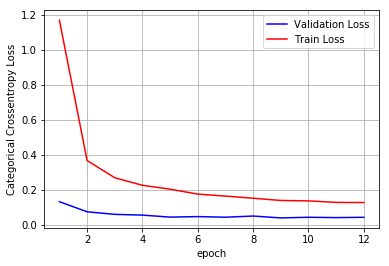

In [0]:
score = model.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,12+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

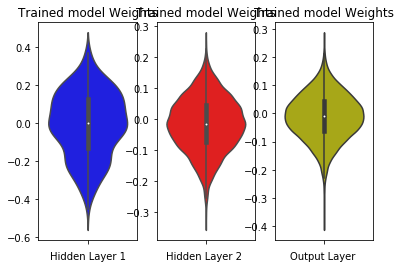

In [0]:
w_after = model.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

## Model-5: 5 Conv-Layers, dropout, Max-pooling with 5*5 kernel:

In [0]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(5, 5),activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(42, kernel_size=(5, 5),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(52, kernel_size=(5, 5),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(62, (5, 5), activation='relu',padding='same'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(72, (5, 5), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.75))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 14s 241us/step - loss: 1.1804 - acc: 0.5733 - val_loss: 0.1147 - val_acc: 0.9735
Epoch 2/12
60000/60000 [==============================] - 11s 190us/step - loss: 0.3211 - acc: 0.9021 - val_loss: 0.0505 - val_acc: 0.9880
Epoch 3/12
60000/60000 [==============================] - 11s 187us/step - loss: 0.2371 - acc: 0.9295 - val_loss: 0.0463 - val_acc: 0.9887
Epoch 4/12
60000/60000 [==============================] - 11s 190us/step - loss: 0.1991 - acc: 0.9414 - val_loss: 0.0392 - val_acc: 0.9899
Epoch 5/12
60000/60000 [==============================] - 11s 188us/step - loss: 0.1736 - acc: 0.9498 - val_loss: 0.0400 - val_acc: 0.9903
Epoch 6/12
60000/60000 [==============================] - 12s 193us/step - loss: 0.1627 - acc: 0.9532 - val_loss: 0.0360 - val_acc: 0.9918
Epoch 7/12
60000/60000 [==============================] - 11s 190us/step - loss: 0.1534 - acc: 0.9564 - val_loss: 0.

Test score: 0.028561681090549428
Test accuracy: 0.9936


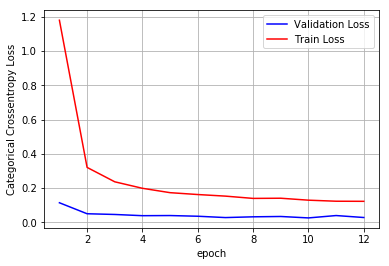

In [0]:
score = model.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,12+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

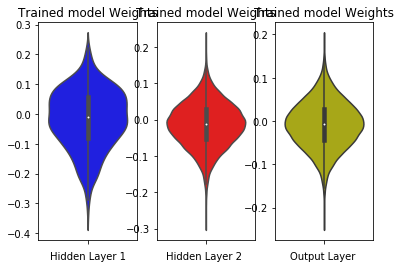

In [0]:
w_after = model.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

## Model-6: 5 Conv-Layers, dropout, Max-pooling with 7*7 kernel:

In [0]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(7, 7),activation='relu',input_shape=input_shape,padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(42, (7, 7), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(52, (7, 7), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(62, (7, 7), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(72, (7, 7), activation='relu',padding='same'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.75))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 20s 333us/step - loss: 1.9886 - acc: 0.2514 - val_loss: 0.7959 - val_acc: 0.7796
Epoch 2/12
60000/60000 [==============================] - 17s 286us/step - loss: 0.6041 - acc: 0.8029 - val_loss: 0.1364 - val_acc: 0.9703
Epoch 3/12
60000/60000 [==============================] - 18s 293us/step - loss: 0.2974 - acc: 0.9197 - val_loss: 0.0899 - val_acc: 0.9797
Epoch 4/12
60000/60000 [==============================] - 17s 291us/step - loss: 0.2165 - acc: 0.9425 - val_loss: 0.0574 - val_acc: 0.9877
Epoch 5/12
60000/60000 [==============================] - 18s 293us/step - loss: 0.1889 - acc: 0.9528 - val_loss: 0.0589 - val_acc: 0.9882
Epoch 6/12
60000/60000 [==============================] - 18s 296us/step - loss: 0.1712 - acc: 0.9586 - val_loss: 0.0508 - val_acc: 0.9907
Epoch 7/12
60000/60000 [==============================] - 19s 312us/step - loss: 0.1548 - acc: 0.9622 - val_loss: 0.

Test score: 0.041424628414865584
Test accuracy: 0.9904


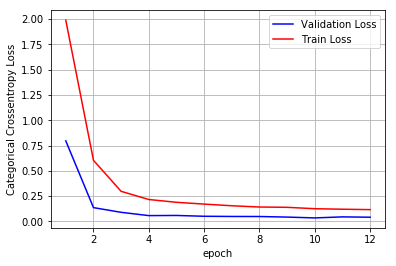

In [0]:
score = model.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,12+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

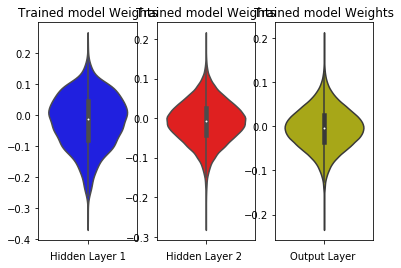

In [0]:
w_after = model.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

## Model-7: 7 Conv-Layers, dropout, Max-pooling with 3*3 kernel:

In [0]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(42, (3, 3), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(52, (3, 3), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.75))

model.add(Conv2D(62, (3, 3), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.75))

model.add(Conv2D(72, (3, 3), activation='relu',padding='same'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.75))

model.add(Conv2D(50, (3, 3), activation='relu',padding='same'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.75))

model.add(Conv2D(20, (3, 3), activation='relu',padding='same'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.75))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 13s 209us/step - loss: 2.2540 - acc: 0.1451 - val_loss: 1.7967 - val_acc: 0.3272
Epoch 2/12
60000/60000 [==============================] - 10s 164us/step - loss: 1.5798 - acc: 0.3516 - val_loss: 1.2245 - val_acc: 0.4372
Epoch 3/12
60000/60000 [==============================] - 10s 164us/step - loss: 1.2581 - acc: 0.5117 - val_loss: 0.9676 - val_acc: 0.5045
Epoch 4/12
60000/60000 [==============================] - 10s 164us/step - loss: 1.0393 - acc: 0.6448 - val_loss: 0.7733 - val_acc: 0.6249
Epoch 5/12
60000/60000 [==============================] - 10s 164us/step - loss: 0.9233 - acc: 0.6959 - val_loss: 0.8859 - val_acc: 0.4869
Epoch 6/12
60000/60000 [==============================] - 10s 165us/step - loss: 0.8153 - acc: 0.7503 - val_loss: 0.6315 - val_acc: 0.7194
Epoch 7/12
60000/60000 [==============================] - 10s 165us/step - loss: 0.7425 - acc: 0.7775 - val_loss: 0.

Test score: 0.4869926846504211
Test accuracy: 0.8385


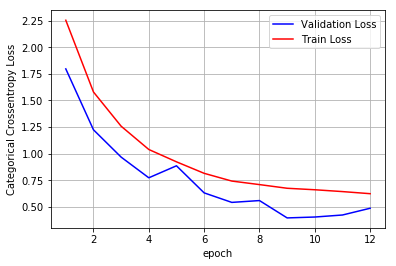

In [0]:
score = model.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,12+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

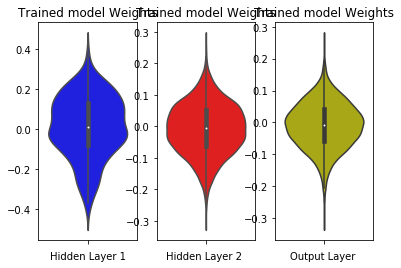

In [0]:
w_after = model.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

## Model-8: 7 Conv-Layers, dropout, Max-pooling with 5*5 kernel:

In [0]:
input_shape

(28, 28, 1)

In [0]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(5, 5),activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(42, kernel_size=(5, 5),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.20))

model.add(Conv2D(54, kernel_size=(5, 5),activation='relu',padding='same'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(30, kernel_size=(5, 5),activation='relu',padding='same'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.32))

model.add(Conv2D(22, kernel_size=(5, 5),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

model.add(Conv2D(10, (5, 5), activation='relu',padding='same'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.13))

model.add(Conv2D(20, (5, 5), activation='relu',padding='same'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.20))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 14s 232us/step - loss: 0.5739 - acc: 0.8104 - val_loss: 0.0710 - val_acc: 0.9816
Epoch 2/12
60000/60000 [==============================] - 11s 183us/step - loss: 0.1063 - acc: 0.9720 - val_loss: 0.0421 - val_acc: 0.9879
Epoch 3/12
60000/60000 [==============================] - 11s 183us/step - loss: 0.0733 - acc: 0.9806 - val_loss: 0.0466 - val_acc: 0.9875
Epoch 4/12
60000/60000 [==============================] - 11s 183us/step - loss: 0.0581 - acc: 0.9850 - val_loss: 0.0317 - val_acc: 0.9901
Epoch 5/12
60000/60000 [==============================] - 11s 184us/step - loss: 0.0513 - acc: 0.9871 - val_loss: 0.0300 - val_acc: 0.9921
Epoch 6/12
60000/60000 [==============================] - 11s 184us/step - loss: 0.0443 - acc: 0.9882 - val_loss: 0.0275 - val_acc: 0.9927
Epoch 7/12
60000/60000 [==============================] - 11s 184us/step - loss: 0.0378 - acc: 0.9898 - val_loss: 0.

Test score: 0.031318415241015876
Test accuracy: 0.9923


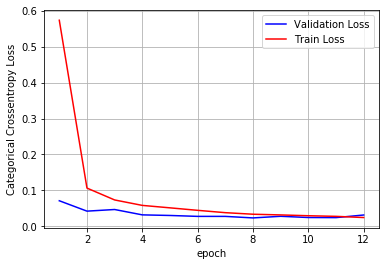

In [0]:
score = model.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,12+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

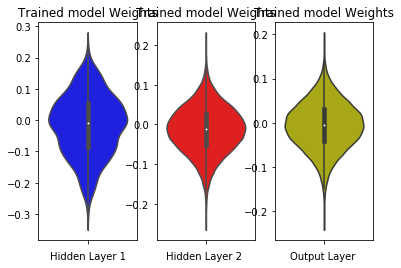

In [0]:
w_after = model.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

## Model-9: 7 Conv-Layers, dropout, Max-pooling with 7*7 kernel:

In [0]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(7, 7),activation='relu',input_shape=input_shape,padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(42, (7, 7), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

model.add(Conv2D(32, (7, 7), activation='relu',padding='same'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

model.add(Conv2D(70, (7, 7), activation='relu',padding='same'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

model.add(Conv2D(23, (7, 7), activation='relu',padding='same'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.20))

model.add(Conv2D(11, (7, 7), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(11, (7, 7), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.001))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 19s 315us/step - loss: 1.3484 - acc: 0.5155 - val_loss: 0.1654 - val_acc: 0.9535
Epoch 2/12
60000/60000 [==============================] - 17s 287us/step - loss: 0.1644 - acc: 0.9591 - val_loss: 0.0519 - val_acc: 0.9870
Epoch 3/12
60000/60000 [==============================] - 17s 289us/step - loss: 0.0876 - acc: 0.9794 - val_loss: 0.0440 - val_acc: 0.9889
Epoch 4/12
60000/60000 [==============================] - 17s 291us/step - loss: 0.0665 - acc: 0.9852 - val_loss: 0.0340 - val_acc: 0.9915
Epoch 5/12
60000/60000 [==============================] - 18s 293us/step - loss: 0.0517 - acc: 0.9881 - val_loss: 0.0403 - val_acc: 0.9903
Epoch 6/12
60000/60000 [==============================] - 18s 293us/step - loss: 0.0433 - acc: 0.9902 - val_loss: 0.0315 - val_acc: 0.9921
Epoch 7/12
60000/60000 [==============================] - 18s 295us/step - loss: 0.0381 - acc: 0.9913 - val_loss: 0.

Test score: 0.03348360838291346
Test accuracy: 0.9936


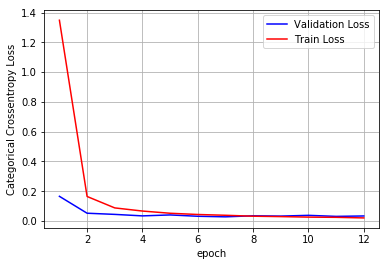

In [0]:
score = model.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,12+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

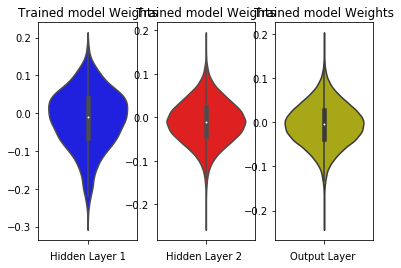

In [0]:
w_after = model.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

## Model-10: 7 Conv-Layers, dropout, Max-pooling with 7*7 kernel with Batch-norm:

In [0]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(7, 7),activation='relu',input_shape=input_shape,padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(42, (7, 7), activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

model.add(Conv2D(32, (7, 7), activation='relu',padding='same'))
model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

model.add(Conv2D(70, (7, 7), activation='relu',padding='same'))
model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

model.add(Conv2D(23, (7, 7), activation='relu',padding='same'))
model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.20))

model.add(Conv2D(11, (7, 7), activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(11, (7, 7), activation='relu',padding='same'))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 23s 388us/step - loss: 0.3466 - acc: 0.8943 - val_loss: 0.1668 - val_acc: 0.9658
Epoch 2/12
60000/60000 [==============================] - 22s 360us/step - loss: 0.0805 - acc: 0.9798 - val_loss: 0.0457 - val_acc: 0.9886
Epoch 3/12
60000/60000 [==============================] - 22s 363us/step - loss: 0.0579 - acc: 0.9856 - val_loss: 0.0505 - val_acc: 0.9873
Epoch 4/12
60000/60000 [==============================] - 22s 365us/step - loss: 0.0456 - acc: 0.9887 - val_loss: 0.0380 - val_acc: 0.9899
Epoch 5/12
60000/60000 [==============================] - 22s 361us/step - loss: 0.0368 - acc: 0.9913 - val_loss: 0.0483 - val_acc: 0.9891
Epoch 6/12
60000/60000 [==============================] - 22s 364us/step - loss: 0.0291 - acc: 0.9926 - val_loss: 0.0459 - val_acc: 0.9902
Epoch 7/12
60000/60000 [==============================] - 24s 395us/step - loss: 0.0255 - acc: 0.9938 - val_loss: 0.

Test score: 0.04018195565084179
Test accuracy: 0.9914


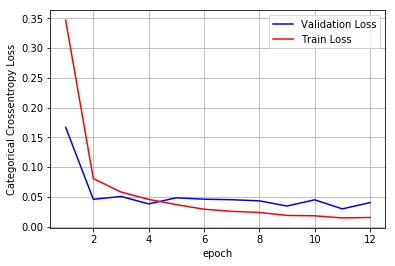

In [0]:
score = model.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,12+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

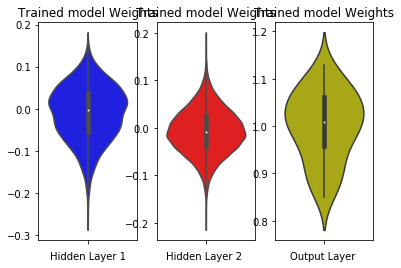

In [0]:
w_after = model.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

## Model-11: 7 Conv-Layers, dropout, Max-pooling with 7*7 kernel with Batch-norm and Sigmoid:

In [0]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(7, 7),activation='sigmoid',input_shape=input_shape,padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(42, (7, 7), activation='sigmoid',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

model.add(Conv2D(32, (7, 7), activation='sigmoid',padding='same'))
model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

model.add(Conv2D(70, (7, 7), activation='sigmoid',padding='same'))
model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

model.add(Conv2D(23, (7, 7), activation='sigmoid',padding='same'))
model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.20))

model.add(Conv2D(11, (7, 7), activation='sigmoid',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(11, (7, 7), activation='sigmoid',padding='same'))

model.add(Flatten())
model.add(Dense(128, activation='sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 22s 369us/step - loss: 2.3255 - acc: 0.1046 - val_loss: 2.3009 - val_acc: 0.1135
Epoch 2/12
60000/60000 [==============================] - 20s 328us/step - loss: 1.5777 - acc: 0.4004 - val_loss: 0.9769 - val_acc: 0.6233
Epoch 3/12
60000/60000 [==============================] - 20s 331us/step - loss: 0.4337 - acc: 0.8905 - val_loss: 1.1614 - val_acc: 0.6891
Epoch 4/12
60000/60000 [==============================] - 20s 335us/step - loss: 0.2184 - acc: 0.9529 - val_loss: 0.2774 - val_acc: 0.9316
Epoch 5/12
60000/60000 [==============================] - 20s 335us/step - loss: 0.1483 - acc: 0.9662 - val_loss: 0.1355 - val_acc: 0.9706
Epoch 6/12
60000/60000 [==============================] - 20s 340us/step - loss: 0.1189 - acc: 0.9726 - val_loss: 0.1102 - val_acc: 0.9744
Epoch 7/12
60000/60000 [==============================] - 20s 340us/step - loss: 0.0961 - acc: 0.9778 - val_loss: 0.

Test score: 0.10474583289409056
Test accuracy: 0.9764


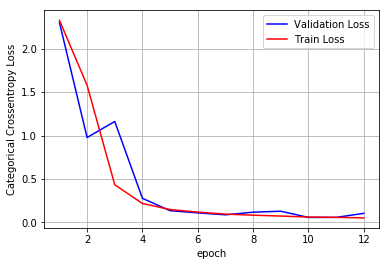

In [0]:
score = model.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,12+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

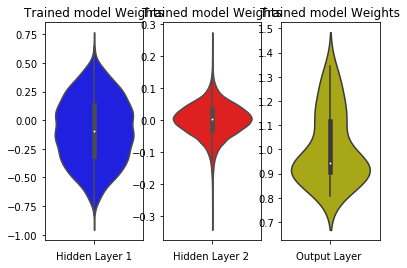

In [0]:
w_after = model.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

## Model-12: 4 Conv-Layers, dropout, Max-pooling with 4*4 kernel with Batch-norm and Sigmoid:

In [0]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(4, 4),activation='sigmoid',input_shape=input_shape,padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(42, (4, 4), activation='sigmoid',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

model.add(Conv2D(32, (4, 4), activation='sigmoid',padding='same'))
model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

model.add(Conv2D(70, (4, 4), activation='sigmoid',padding='same'))
model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 17s 277us/step - loss: 0.6117 - acc: 0.8013 - val_loss: 0.1473 - val_acc: 0.9531
Epoch 2/12
60000/60000 [==============================] - 14s 232us/step - loss: 0.1505 - acc: 0.9566 - val_loss: 0.1003 - val_acc: 0.9694
Epoch 3/12
60000/60000 [==============================] - 14s 232us/step - loss: 0.0984 - acc: 0.9711 - val_loss: 0.1053 - val_acc: 0.9655
Epoch 4/12
60000/60000 [==============================] - 14s 231us/step - loss: 0.0770 - acc: 0.9776 - val_loss: 0.0595 - val_acc: 0.9801
Epoch 5/12
60000/60000 [==============================] - 14s 231us/step - loss: 0.0612 - acc: 0.9821 - val_loss: 0.0425 - val_acc: 0.9863
Epoch 6/12
60000/60000 [==============================] - 14s 232us/step - loss: 0.0541 - acc: 0.9836 - val_loss: 0.0599 - val_acc: 0.9822
Epoch 7/12
60000/60000 [==============================] - 14s 232us/step - loss: 0.0443 - acc: 0.9864 - val_loss: 0.

Test score: 0.02927502671419061
Test accuracy: 0.9898


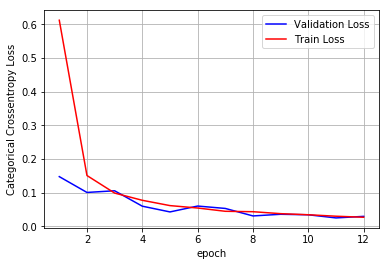

In [0]:
score = model.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,12+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

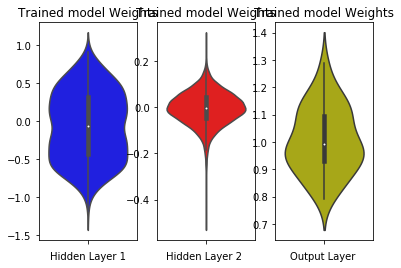

In [0]:
w_after = model.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

# Results(Pretty Table):

In [0]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Model","Layers","Kernels", "Test loss", "Test Accuracy"]
x.add_row(["1","3", "(3*3)" ,"0.070", "0.978"])
x.add_row(["2","3", "(5*5)" ,"0.021", "0.994"])
x.add_row(["3","3", "(7*7)" ,"0.020", "0.994"])
x.add_row(["4","5", "(3*3)" ,"0.038", "0.990"])
x.add_row(["5","5", "(5*5)" ,"0.028", "0.993"])
x.add_row(["6","5", "(7*7)" ,"0.041", "0.992"])
x.add_row(["7","7", "(3*3)" ,"0.304", "0.889"])
x.add_row(["8","7", "(5*5)" ,"0.024", "0.993"])
x.add_row(["9","7", "(7*7)" ,"0.043", "0.992"])
x.add_row(["10","7", "(7*7)" ,"0.040", "0.991"])
x.add_row(["11","7", "(7*7)" ,"0.104", "0.976"])
x.add_row(["12","4", "(4*4)" ,"0.029", "0.989"])
print(x)

+-------+--------+---------+-----------+---------------+
| Model | Layers | Kernels | Test loss | Test Accuracy |
+-------+--------+---------+-----------+---------------+
|   1   |   3    |  (3*3)  |   0.070   |     0.978     |
|   2   |   3    |  (5*5)  |   0.021   |     0.994     |
|   3   |   3    |  (7*7)  |   0.020   |     0.994     |
|   4   |   5    |  (3*3)  |   0.038   |     0.990     |
|   5   |   5    |  (5*5)  |   0.028   |     0.993     |
|   6   |   5    |  (7*7)  |   0.041   |     0.992     |
|   7   |   7    |  (3*3)  |   0.304   |     0.889     |
|   8   |   7    |  (5*5)  |   0.024   |     0.993     |
|   9   |   7    |  (7*7)  |   0.043   |     0.992     |
|   10  |   7    |  (7*7)  |   0.040   |     0.991     |
|   11  |   7    |  (7*7)  |   0.104   |     0.976     |
|   12  |   4    |  (4*4)  |   0.029   |     0.989     |
+-------+--------+---------+-----------+---------------+


### Conclusion : 
1. As you can see from the above table , i ran the first 3 of 3 layers with different kernels and got a max accuracy of 0.994 among them.
2. For the next three models i have given 5 layers of Convolution with again various kernels and got max accuracy of 0.993
3. For the next three models i have given 7 layers of Convolution with again various kernels and got max accuracy of 0.993 among them
4. Now for the 10th model i used Batch normalization , but didn't improved much
5. For 11th model i've used batch normalization along with sigmoid activations units in every hidden layers and got a accuracy of 0.976 which is decremental than other models
6. And for the final model i've given 4 layers of Convolutions with Sigmoid activations and along with that i also used batch normalization and got a accuracy of 0.989